In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [8]:
df = pd.DataFrame(reviews, columns=['reviews'])

df.head()

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...
2,Not Verified | As a Spanish born individual l...
3,✅ Trip Verified | A rather empty and quiet fl...
4,✅ Trip Verified | Easy check in and staff mem...


In [9]:
df.to_csv('airline_reviews.csv')

In [33]:
df['reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: reviews
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


# Pre processing

In [11]:
import re

def preprocess_text(text):
    # Remove unwanted characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['reviews'] = df['reviews'].apply(preprocess_text)
df['reviews'].sample(10)

1232     verified review   flew london heathrow to kal...
1772    what a shame to once upon a time being such a ...
1743    heathrow to houston with british airways worst...
145      trip verified   another dreadful mediocre exp...
430     not verified   frankfurt to london with britis...
1125     trip verified   london to miami british airwa...
1400     verified review   rome to london thursday may...
3        trip verified   a rather empty and quiet flig...
1866     verified review   madrid to perth via singapo...
96       trip verified   my wife and i booked a flight...
Name: reviews, dtype: object

In [13]:
#to remove unnecessary words
def remove_verified_review(text):
    text = text.replace("verified review", "")
    text = text.replace("not verified", "")
    text = text.replace("verified", "")
    text = text.replace("trip verified", "")
    return text
df['reviews'] = df['reviews'].apply(remove_verified_review)

df['reviews'].sample(10)

283      trip    my flight from boston to heathrow arr...
368      trip   paris to london flight cancelled due t...
1183        london to zurich a budget airline at premi...
400        london to los angeles take off was delayed ...
503        calgary to gothenburg via london with briti...
186      trip    we flew to funchal madeira yesterday ...
316        i entered the plane with a bunch of white f...
299      trip    i usually avoid ba because of its app...
1646        flight from athens to heathrow delayed by ...
1407        london heathrow to san francisco return an...
Name: reviews, dtype: object

In [15]:
#lemmatization and removing stopwords

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words
df['reviews'] = df['reviews'].apply(preprocess_text)
df['reviews'].sample(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kibe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kibe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kibe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1260        florence to bristol a positive first exper...
27       trip    stupidly tried ba again after a five ...
1505        flew from gatwick to cancun british airway...
74       trip    london to istanbul british airways bu...
1525        london to dublin i had not flown with brit...
344      trip    i flew with ba recently from sydney t...
1312        naples to gatwick i used to admire and lov...
119      trip   ba is still charging premium airlines ...
331      trip    london to frankfurt i made the mistak...
1861        \r\nflew from london heathrow to seattle p...
Name: reviews, dtype: object

# Sentiment Analysis

In [19]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
        
# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a new column to store the sentiment scores
df['sentiment_score'] = df['reviews'].apply(lambda review: sia.polarity_scores(review)['compound'])

# Create a new column to store the sentiment labels
df['sentiment_label'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

df.sample(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kibe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,sentiment_score,sentiment_label
1393,los angeles to london british airways has ...,-0.7964,negative
1260,florence to bristol a positive first exper...,0.9411,positive
1036,trip i booked my flight with cathay pacifi...,-0.5996,negative
1695,london to philadelphia we paid for the pre...,-0.3628,negative
1453,berlin to london what an embarrassment our...,0.6249,positive
942,trip this is the first time i have flown b...,0.9840,positive
997,trip london heathrow to dallas the aircraf...,0.4623,positive
1253,london to keflavik british airways lost on...,-0.8225,negative
637,trip cpt is definitely getting its act toge...,0.7506,positive
804,trip having booked ba business class and p...,-0.9552,negative


In [20]:
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_percentages = sentiment_counts / df.shape[0] * 100

print(sentiment_counts)
print(sentiment_percentages)

positive    1084
negative     910
neutral        6
Name: sentiment_label, dtype: int64
positive    54.2
negative    45.5
neutral      0.3
Name: sentiment_label, dtype: float64


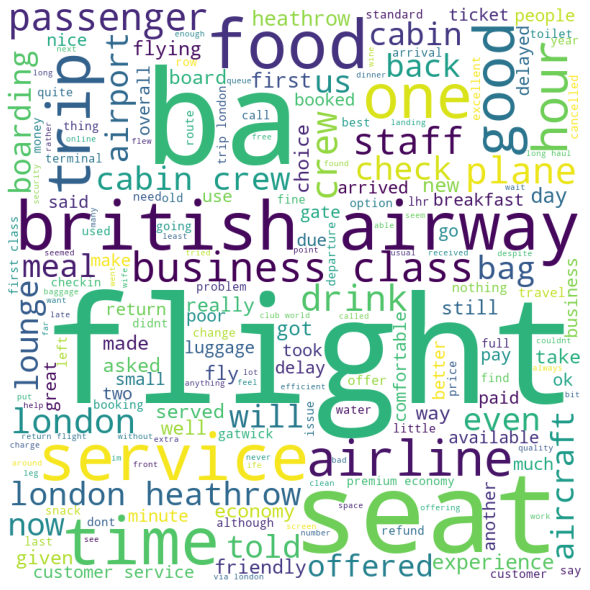

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import STOPWORDS
# Create a single string of all the reviews
reviews = " ".join(review for review in df.reviews)

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(reviews)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()